# Imports

In [85]:
# Python standard library
import sys

# Scientific computing
import numpy as np
import cv2
import matplotlib.pyplot as plt
import scipy.ndimage

# Program specific
sys.path.append('/home/prestonh/Desktop/Research/pore_stats/pore_stats/oi/')
import optical_imaging as oi
import oi_file


# Jupyter
from IPython.display import HTML

# Load data

In [7]:
date = '7-7-2017/'
particle = '293-T/'
channel = '17p5-35-17p5_0/'
file_index = '0'

base_path = '/home/prestonh/Desktop/Research/cancer_cells/data/'

oi_vid_file_path = base_path + date + particle + channel + 'oi/bin/test_camera_' + file_index
oi_events_file_path = base_path + date + particle + channel + 'oi/events/test_camera_' + file_index + '_events.json'

In [8]:
# Load video
oi_vid = oi_file.Video(oi_vid_file_path, 512, 288, 100000)

# Load events
oi_events = oi_file.open_event_file_json(oi_events_file_path)

/home/prestonh/Desktop/Research/pore_stats/pore_stats/oi/optical_imaging.py:62: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if pixels != None:


# Load template and create stage

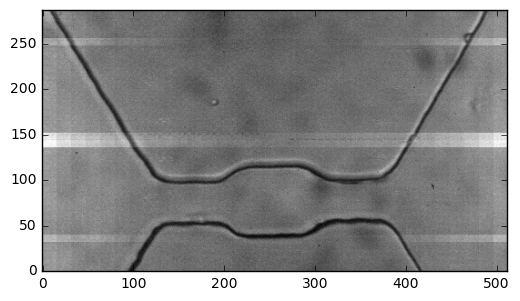

In [202]:
template_index = 0

template_frame = oi_vid.get_frame(template_index)

plt.imshow(template_frame, cmap = 'gray', origin = 'lower')
plt.show()

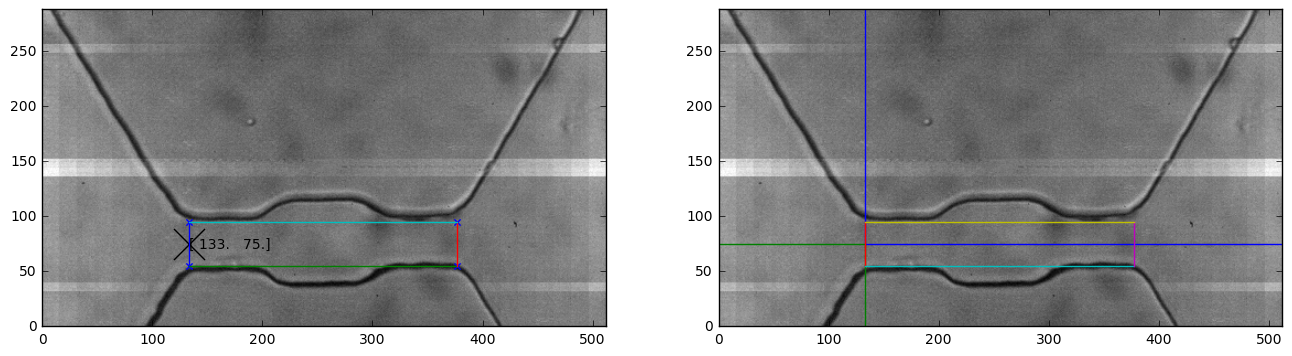

In [203]:
reload(oi)
template_index = 0
template_frame = oi_vid.get_frame(template_index)
c0 = [133, 95]
c1 = [133, 55]
c2 = [377, 55] 
c3 = [377, 95]
oi_stage = oi.Stage(template_frame, c0, c1, c2, c3)
oi_stage.plot_stage()

# Find a good event

In [213]:
oi_index = 3
reload(oi_file)
plt.close()
HTML(oi_file.make_animation(oi_vid, oi_events[oi_index]._detections[0]._tf, oi_events[oi_index]._detections[-1]._tf).to_html5_video())

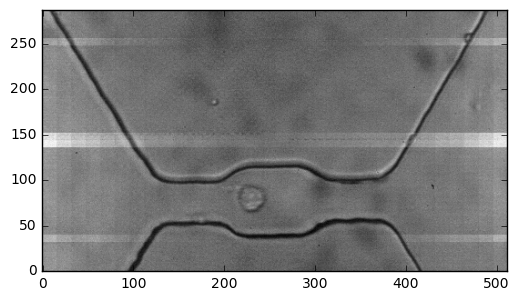

In [279]:
oi_event = oi_events[3]
detection = oi_event._detections[50]
raw_frame = oi_vid.get_frame(detection._tf)

plt.imshow(raw_frame, cmap = 'gray', origin = 'lower')
plt.show()

# Plotting functions

In [ ]:
def plot_frame(frame, x0 = None, x1 = None, y0 = None, y1 = None):
    plt.imshow(frame, cmap = 'gray', origin = 'lower', interpolation = 'none')
    
    #if x0 and x1:
#        plt.xlim(x0, x1)
#    if y0 and y1:
#        plt.ylim(y0, y1)
    plt.show()
    
def plot_processed_over_raw(processed_frame, frame, x0 = None, x1 = None, y0 = None, y1 = None):
    green_processed_frame = np.zeros((processed_frame.shape[0], processed_frame.shape[1], 3))
    green_processed_frame[:,:,1] = processed_frame

    plt.imshow(frame, cmap = 'gray', origin = 'lower', alpha = 1, interpolation = 'none')
    plt.imshow(green_processed_frame, cmap = 'gray', origin = 'lower', alpha = 0.15, interpolation = 'none')
    #plt.xlim(x0,x1)
    #plt.ylim(y0,y1)
    plt.show()

# Canny

/home/prestonh/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


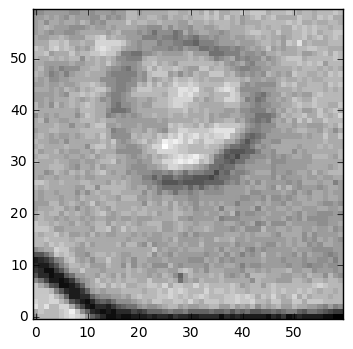

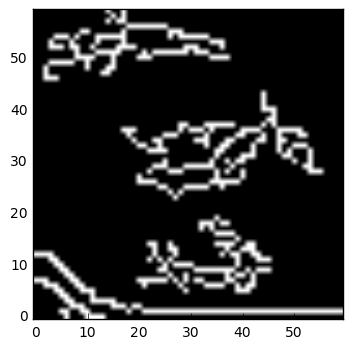

In [241]:
x0 = detection._px - 30
x1 = detection._px + 30
y0 = detection._py - 30
y1 = detection._py + 30
frame = raw_frame[y0:y1, x0:x1]

plt.imshow(frame, cmap = 'gray', origin = 'lower', interpolation = 'none')
plt.show()

edges = cv2.Canny(np.array(frame*255, dtype = np.uint8),2,25)
plt.imshow(edges, cmap = 'gray', origin = 'lower')
plt.show()

# Shadow thresholding

In [280]:
print raw_frame
print np.where(raw_frame <= .11)

[[ 0.10980392  0.11372549  0.11372549 ...,  0.10196078  0.10196078
   0.10196078]
 [ 0.11372549  0.11764706  0.10980392 ...,  0.10196078  0.10196078
   0.10196078]
 [ 0.11372549  0.11372549  0.11764706 ...,  0.10196078  0.10196078
   0.09803922]
 ..., 
 [ 0.10980392  0.11764706  0.11764706 ...,  0.10588235  0.10980392
   0.10588235]
 [ 0.12156863  0.1254902   0.1254902  ...,  0.10196078  0.11372549
   0.10588235]
 [ 0.12156863  0.1254902   0.1254902  ...,  0.10588235  0.10980392
   0.10588235]]
(array([  0,   0,   0, ..., 287, 287, 287]), array([  0,   4,   5, ..., 509, 510, 511]))


/home/prestonh/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


copy


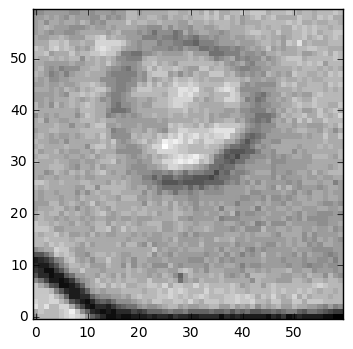

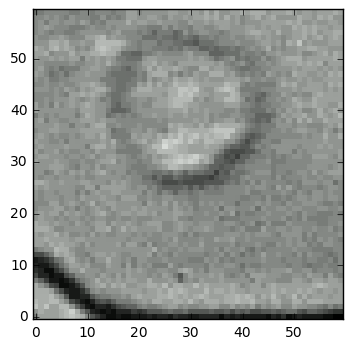

gaussian blur


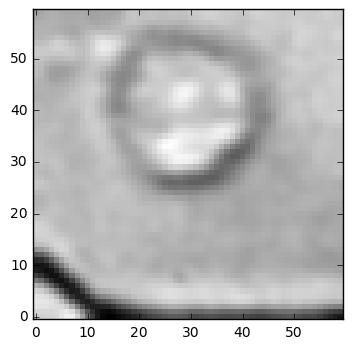

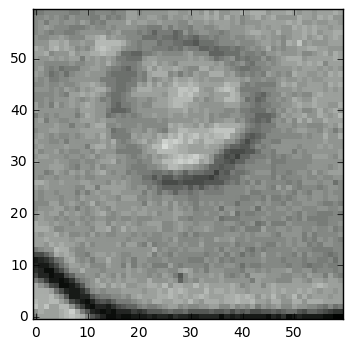

dark threshold


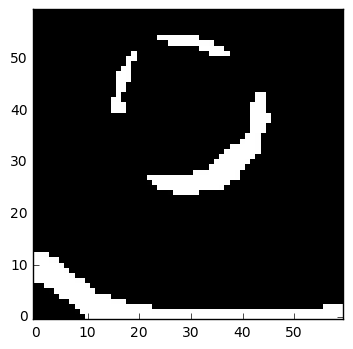

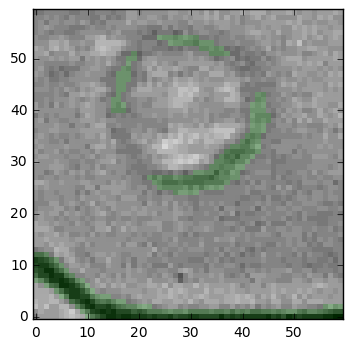

morphological closing


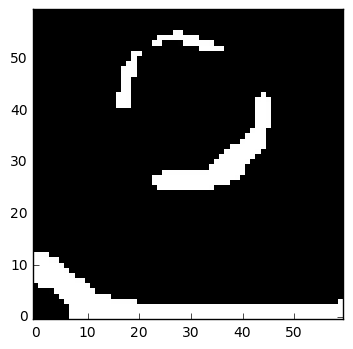

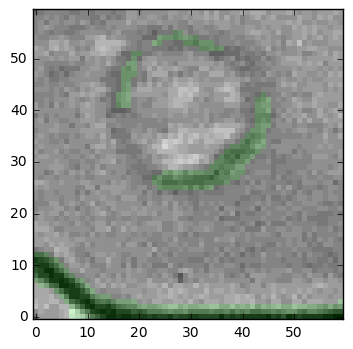

In [305]:
# Crop raw frame
x0 = detection._px - 30
x1 = detection._px + 30
y0 = detection._py - 30
y1 = detection._py + 30
frame = np.copy(raw_frame[y0:y1, x0:x1])

# Copy
print 'copy'
processed_frame = np.copy(frame)
plot_frame(processed_frame, x0, x1, y0, y1)
plot_processed_over_raw(processed_frame, frame, x0, x1, y0, y1)

# Blur
print 'gaussian blur'
window = (5,5)
processed_frame = cv2.GaussianBlur(processed_frame, window, 0)
plot_frame(processed_frame, x0, x1, y0, y1)
plot_processed_over_raw(processed_frame, frame, x0, x1, y0, y1)


# Dark threshold
print 'dark threshold'
threshold = .085
above_indices = np.where(processed_frame > threshold)
below_indices = np.where(processed_frame <= threshold)

processed_frame[above_indices[0], above_indices[1]] = 0
processed_frame[below_indices[0], below_indices[1]] = 1

plot_frame(processed_frame)
plot_processed_over_raw(processed_frame, frame, x0, x1, y0, y1)



# Morphological closing
print 'morphological closing'
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(10,10))
processed_frame = cv2.morphologyEx(np.array(processed_frame, dtype = np.uint8), cv2.MORPH_CLOSE, kernel)
plot_frame(processed_frame, x0, x1, y0, y1)
plot_processed_over_raw(processed_frame, frame, x0, x1, y0, y1)

# Complex process

absolute value difference
copy


/home/prestonh/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


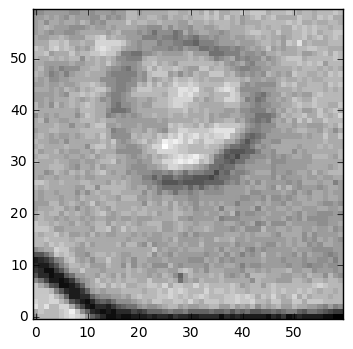

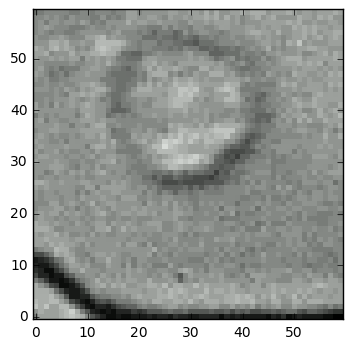

negative


/home/prestonh/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


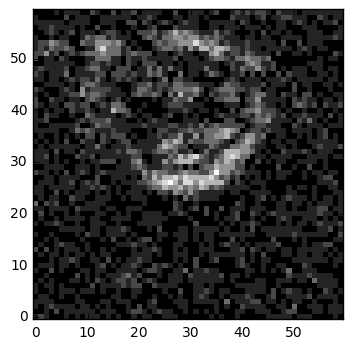

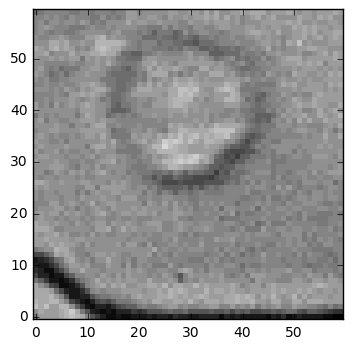

gaussian blur


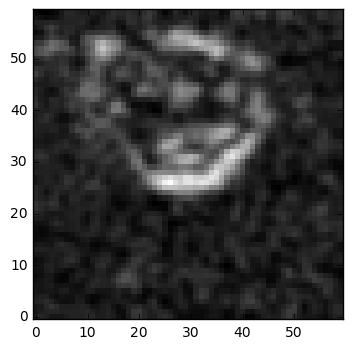

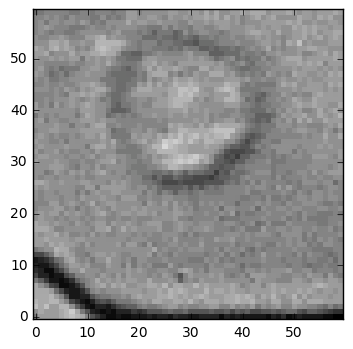

threshold


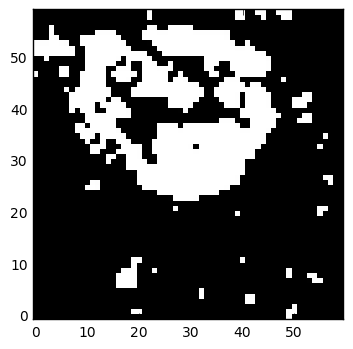

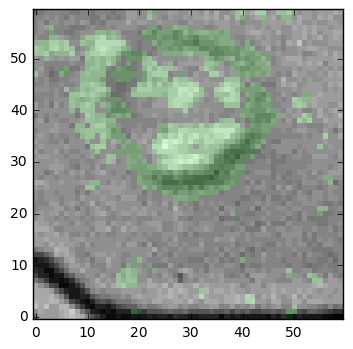

erode subtraction


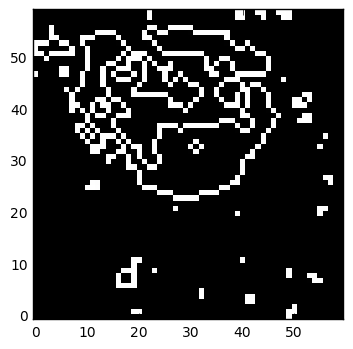

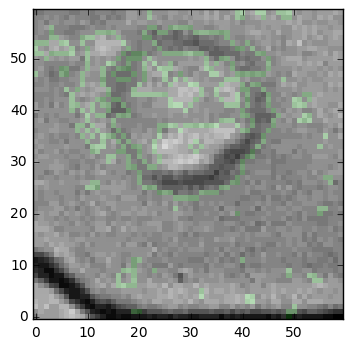

fill holes


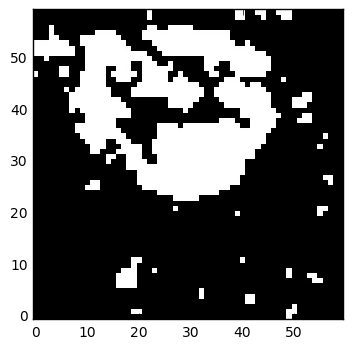

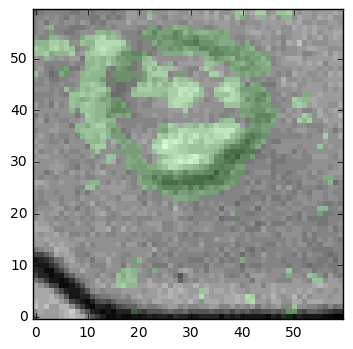

clustering


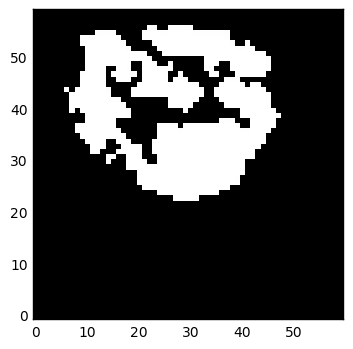

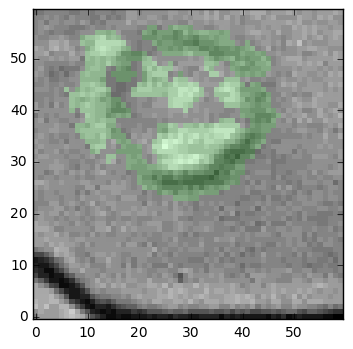

morphological closing


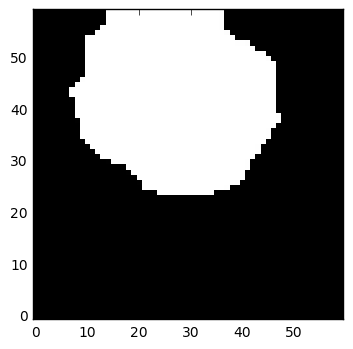

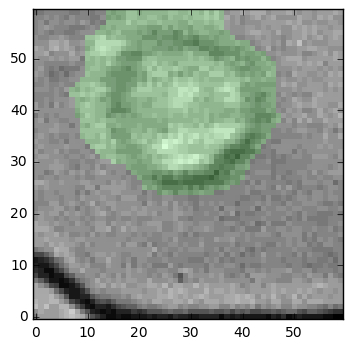

erode subtraction


/home/prestonh/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:78: DeprecationWarning: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.


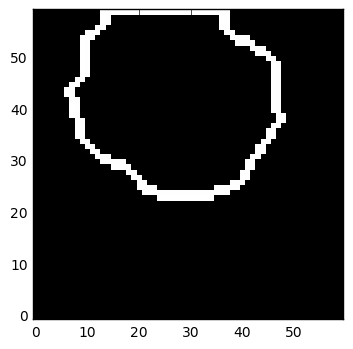

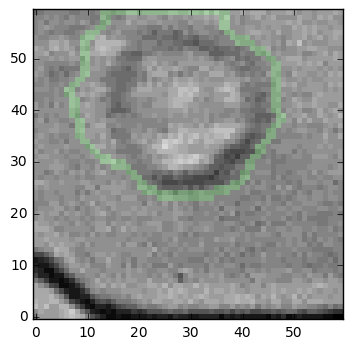

In [243]:
print 'absolute value difference'



# Crop raw frame
x0 = detection._px - 30
x1 = detection._px + 30
y0 = detection._py - 30
y1 = detection._py + 30
frame = raw_frame[y0:y1, x0:x1]

# Copy
print 'copy'
processed_frame = 1.*frame
plot_frame(processed_frame, x0, x1, y0, y1)
plot_processed_over_raw(processed_frame, frame, x0, x1, y0, y1)

# Negative
print 'negative'
processed_frame = np.abs(frame - template_frame[y0:y1, x0:x1])
plot_frame(processed_frame, x0, x1, y0, y1)
plot_processed_over_raw(processed_frame, frame, x0, x1, y0, y1)

# Blur
print 'gaussian blur'
window = (3,3)
processed_frame = cv2.GaussianBlur(processed_frame, window, 0)
plot_frame(processed_frame, x0, x1, y0, y1)
plot_processed_over_raw(processed_frame, frame, x0, x1, y0, y1)

# Threshold
print 'threshold'
threshold = .0045
processed_frame[processed_frame > threshold] = 1
processed_frame[processed_frame <= threshold] = 0
plot_frame(processed_frame, x0, x1, y0, y1)
plot_processed_over_raw(processed_frame, frame, x0, x1, y0, y1)





# Erode subtraction
print 'erode subtraction'
processed_frame = processed_frame - scipy.ndimage.morphology.binary_erosion(processed_frame, iterations = 1)
plot_frame(processed_frame, x0, x1, y0, y1)
plot_processed_over_raw(processed_frame, frame, x0, x1, y0, y1)

# Fill holes
print 'fill holes'
processed_frame = scipy.ndimage.binary_fill_holes(processed_frame)
plot_frame(processed_frame, x0, x1, y0, y1)
plot_processed_over_raw(processed_frame, frame, x0, x1, y0, y1)

# Get largest cluster
print 'clustering'
clusters = oi.find_clusters_percentage_based(processed_frame, np.zeros((processed_frame.shape[0], processed_frame.shape[1])), diag = True)
largest_cluster = sorted(clusters, key = lambda x: len(x))[-1]
processed_frame = np.zeros(processed_frame.shape, dtype = np.uint8)
for pixel in largest_cluster:
    processed_frame[pixel[0], pixel[1]] = 1
plot_frame(processed_frame, x0, x1, y0, y1)
plot_processed_over_raw(processed_frame, frame, x0, x1, y0, y1)



# Morphological closing
print 'morphological closing'
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(10,10))
processed_frame = cv2.morphologyEx(np.array(processed_frame, dtype = np.uint8), cv2.MORPH_CLOSE, kernel)
plot_frame(processed_frame, x0, x1, y0, y1)
plot_processed_over_raw(processed_frame, frame, x0, x1, y0, y1)



# Dilate/erode subtraction
print 'erode subtraction'
processed_frame = scipy.ndimage.morphology.binary_dilation(processed_frame, iterations = 1) - scipy.ndimage.morphology.binary_erosion(processed_frame, iterations = 1)
plot_frame(processed_frame, x0, x1, y0, y1)
plot_processed_over_raw(processed_frame, frame, x0, x1, y0, y1)

# All-frame processing

In [208]:
def preprocess_frame(raw_frame, template_frame):
    



    # Crop raw frame
    x0 = detection._px - 30
    x1 = detection._px + 30
    y0 = detection._py - 30
    y1 = detection._py + 30

    frame = raw_frame[y0:y1, x0:x1]

    # Copy
    processed_frame = 1.*frame


    # Negative
    processed_frame = np.abs(frame - template_frame[y0:y1, x0:x1])

    # Blur
    window = (5,5)
    processed_frame = cv2.GaussianBlur(processed_frame, window, 0)

    # Threshold
    threshold = .005
    processed_frame[processed_frame > threshold] = 1
    processed_frame[processed_frame <= threshold] = 0


    # Erode subtraction
    processed_frame = processed_frame - scipy.ndimage.morphology.binary_erosion(processed_frame, iterations = 1)


    # Fill holes
    processed_frame = scipy.ndimage.binary_fill_holes(processed_frame)


    # Get largest cluster
    clusters = oi.find_clusters_percentage_based(processed_frame, np.zeros((processed_frame.shape[0], processed_frame.shape[1])), diag = True)
    largest_cluster = sorted(clusters, key = lambda x: len(x))[-1]
    processed_frame = np.zeros(processed_frame.shape, dtype = np.uint8)
    for pixel in largest_cluster:
        processed_frame[pixel[0], pixel[1]] = 1




    # Morphological closing
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(10,10))
    processed_frame = cv2.morphologyEx(np.array(processed_frame, dtype = np.uint8), cv2.MORPH_CLOSE, kernel)




    # Dilate/erode subtraction
    processed_frame = scipy.ndimage.morphology.binary_dilation(processed_frame, iterations = 1) - scipy.ndimage.morphology.binary_erosion(processed_frame, iterations = 1)

    plot_processed_over_raw(processed_frame, frame, x0, x1, y0, y1)

/home/prestonh/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:12: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/prestonh/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:19: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/prestonh/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:57: DeprecationWarning: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.


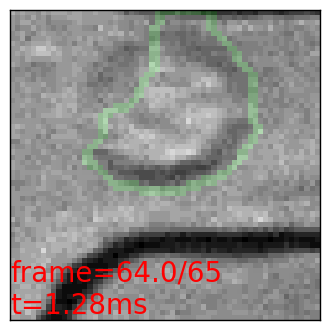

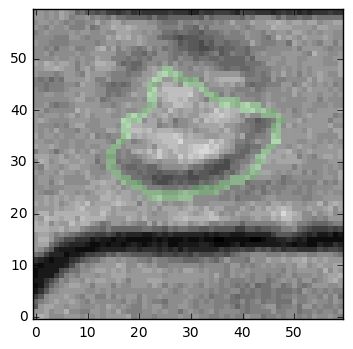

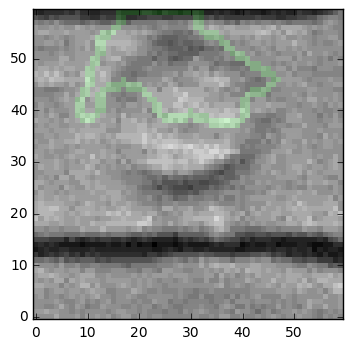

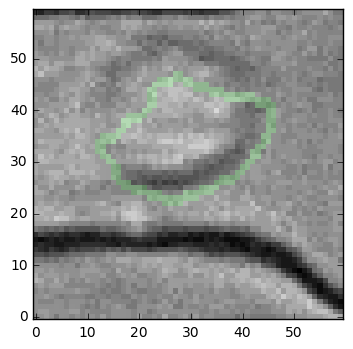

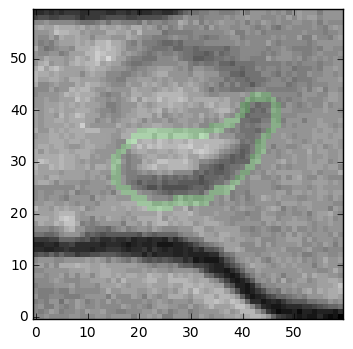

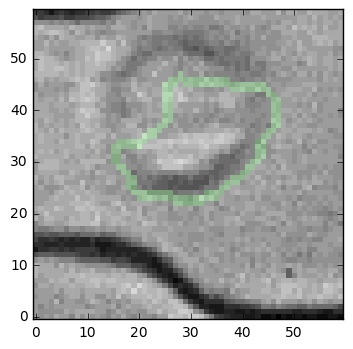

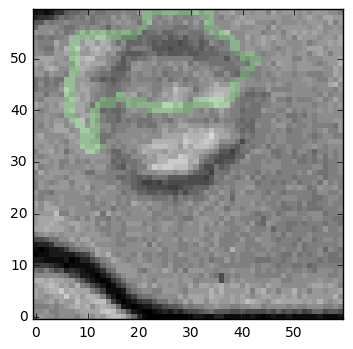

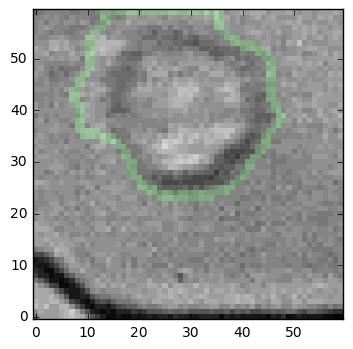

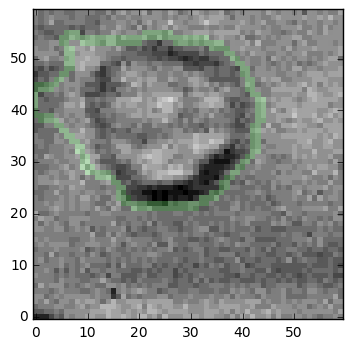

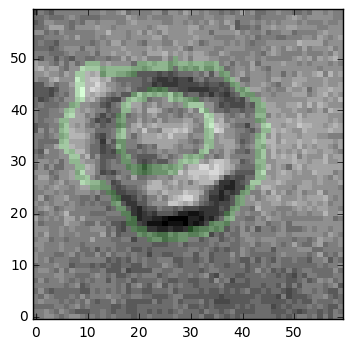

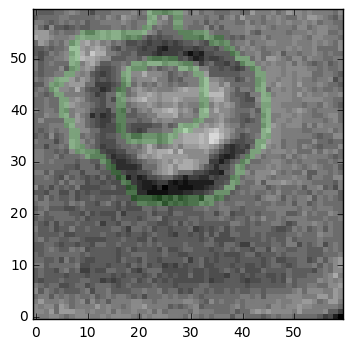

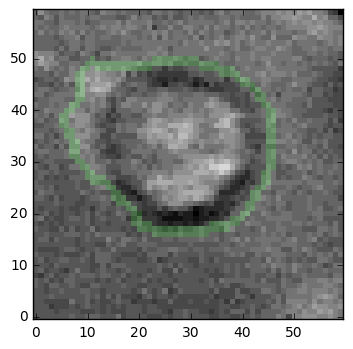

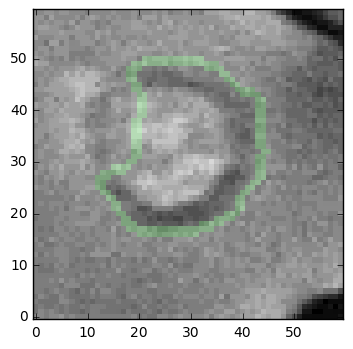

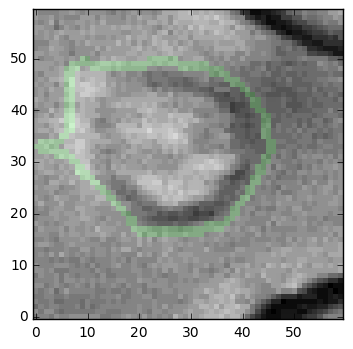

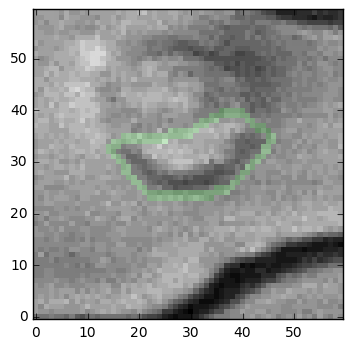

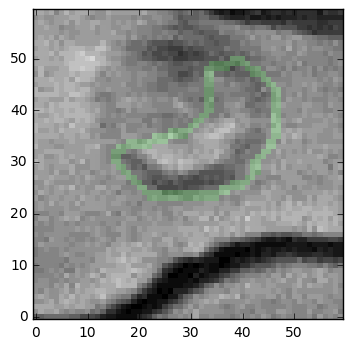

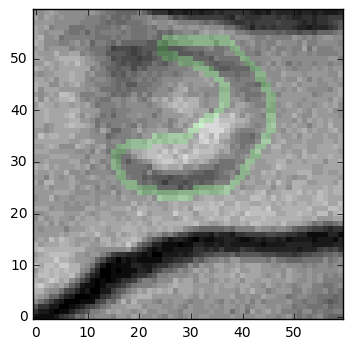

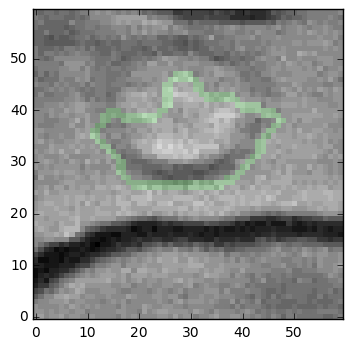

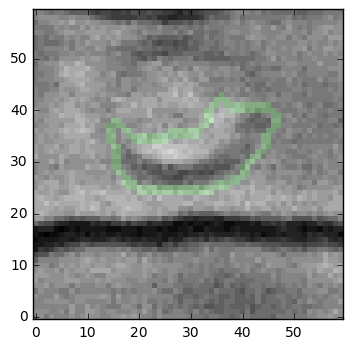

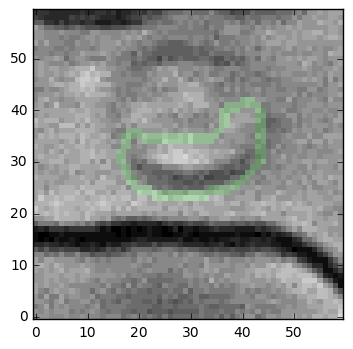

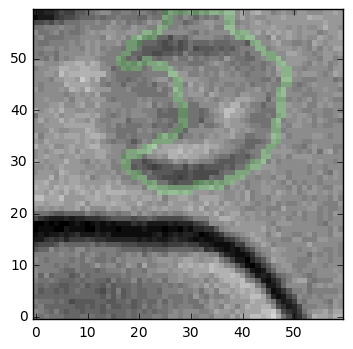

In [214]:
oi_event = oi_events[3]

oi_event.get_channel_enter_exit_tf(oi_stage)

for i in range(oi_event._channel_enter_tf, oi_event._channel_exit_tf + 1):
    detection = oi_event._detections[i - oi_event._detections[0]._tf]
    raw_frame = oi_vid.get_frame(detection._tf)
    
    preprocess_frame(raw_frame, template_frame)

In [134]:
# Fit ellipse
print 'ellipse fit'
xs, ys = np.where(processed_frame == 1)
ellipse = oi.fit_ellipse(xs, ys)

ellipse_center = oi.get_ellipse_center(ellipse)
ellipse_angle = oi.get_ellipse_angle_of_rotation(ellipse)
ellipse_axes_lengths = oi.get_ellipse_axes_lengths(ellipse)

num_points = 100
ellipse_edge_pixels = np.empty((num_points,2))
for i in range(num_points):
    theta = (1.*i)/num_points * 2.*np.pi
    x = ellipse_axes_lengths[0]*np.cos(theta)
    y = ellipse_axes_lengths[1]*np.sin(theta)
    ellipse_edge_pixels[i,0] = ellipse_center[0] + np.cos(ellipse_angle)*x - np.sin(ellipse_angle)*y
    ellipse_edge_pixels[i,1] = ellipse_center[1] + np.sin(ellipse_angle)*x + np.cos(ellipse_angle)*y
    


/home/prestonh/Desktop/Research/pore_stats/pore_stats/oi/optical_imaging.py:518: RuntimeWarning: invalid value encountered in sqrt
  res2=np.sqrt(up/down2)
